In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

import mapclassify

## Loading in data

In [4]:
# main dataset
ward_data = pd.read_csv('london_data/ward_profiles_cleaned.csv')

In [5]:
# shapefile to add spatial element
ward_shape = gpd.read_file('london_data/ESRI/London_Ward.shp')

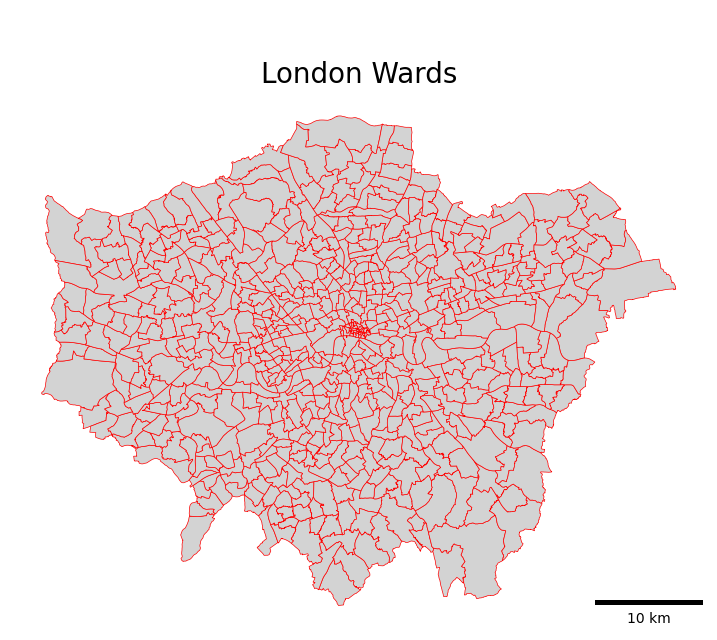

<Figure size 640x480 with 0 Axes>

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib_scalebar.scalebar import ScaleBar

# Load a GeoDataFrame (replace this with your own GeoDataFrame)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(9, 7))

# Plot the geographical data
ward_shape.plot(ax=ax, color='lightgrey', edgecolor='red', linewidth=0.5)

# Add a north arrow
ax.annotate('N', xy=(0.5, 0.98), xycoords='figure fraction', ha='center',
            va='center', fontsize=16, color='red', weight='bold')

# Add a scale bar
scalebar = ScaleBar(1, location='lower right')  # Adjust the scale as per your map
ax.add_artist(scalebar)

plt.title('London Wards', fontsize=20)
plt.axis('off')  # Turn off the axis

plt.show()

plt.savefig('london_ward_boundaries.jpg', dpi=300, bbox_inches='tight')

In [7]:
#data cleaning for the join
ward_shape.columns = ward_shape.columns.str.strip()

ward_shape.rename(columns={'GSS_CODE': 'GSS_CODE'})

ward_shape

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."
...,...,...,...,...,...,...,...,...
644,Aldgate,E05000002,11.227,0.0,E09000001,City of London,51182,"POLYGON ((533326.100 181359.400, 533336.900 18..."
645,Broad Street,E05000008,8.188,0.0,E09000001,City of London,50669,"POLYGON ((532703.800 181263.500, 532707.800 18..."
646,Coleman Street,E05000012,15.404,0.0,E09000001,City of London,122520,"POLYGON ((532880.500 181723.400, 532884.200 18..."
647,Portsoken,E05000021,6.209,0.0,E09000001,City of London,122516,"POLYGON ((533814.300 180968.900, 533757.200 18..."


In [8]:
# data cleaning for join

ward_data.columns = ward_data.columns.str.strip()

#ward_data.rename(columns={'code':'GSS_CODE'})

ward_data

,Ward name,Old code,GSS_CODE,population_2015,percent_children_15_2015,percent_working_age_2015,percent_aged_65+_2015,mean_age_2013,median_age_2013,area_sq,...,percent_household_socialrented_2011,percent_household_privaterent_2011,percent_no_qualifications_2011,crime_rate_2014,violence_against_person_rate_2014,deliberate_fires_per_1000pp_2014,percent_area_openspace_2014,cars_per_household_2011,avg_public_transport_accessibility_score_2014,percent_travel_work_bike_2011
0,Camden - Bloomsbury,00AGGE,E05000129,11700,6.5,83.9,9.6,34.1,28,1.0,...,28.6,41.6,7.8,314.1,41.6,0.2,9.2,0.2,8.0,5.0
1,Southwark - Cathedrals,00BEGE,E05000536,17250,9.9,83.1,7.0,33.5,29,1.8,...,42.8,28.7,12.7,184.9,32.3,0.7,15.7,0.4,8.0,7.5
2,Westminster - Bryanston and Dorset Square,00BKGC,E05000632,12650,10.6,78.6,10.8,36.6,33,0.7,...,7.8,55.5,8.2,170.5,29.6,0.0,2.1,0.4,8.0,4.8
3,Westminster - Hyde Park,00BKGG,E05000636,13450,13.1,77.2,9.7,35.6,32,1.0,...,9.8,52.3,11.1,152.6,31.1,0.1,8.9,0.5,8.0,4.6
4,Westminster - West End,00BKGW,E05000649,11250,8.7,79.8,11.6,38.8,36,2.0,...,23.5,47.1,9.6,1212.1,152.9,0.4,3.9,0.4,8.0,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Croydon - Sanderstead,00AHGU,E05000160,13200,17.0,62.2,20.9,42.0,44,6.3,...,6.7,7.1,15.1,29.6,6.9,0.1,48.6,1.5,1.7,0.9
655,Hillingdon - Eastcote and East Ruislip,00ASGM,E05000329,12600,17.2,61.7,21.2,42.4,44,4.1,...,7.2,8.2,13.6,41.9,9.6,0.0,33.4,1.5,1.7,1.2
656,Hillingdon - Hillingdon East,00ASGQ,E05000332,13700,22.5,65.7,11.8,35.4,34,3.6,...,14.8,14.6,19.3,55.8,17.7,0.5,48.2,1.3,1.7,1.5
657,Hillingdon - Harefield,00ASGN,E05000330,7750,19.7,63.2,17.1,39.8,40,15.2,...,24.0,10.2,23.8,64.3,19.5,2.4,85.5,1.4,1.4,1.4


In [9]:
#join

merged_ward = ward_shape.join(ward_data.set_index('GSS_CODE'), on='GSS_CODE', how='left')

In [10]:
merged_ward.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'BOROUGH',
       'POLY_ID', 'geometry', 'Ward name', 'Old code', 'population_2015',
       'percent_children_15_2015', 'percent_working_age_2015',
       'percent_aged_65+_2015', 'mean_age_2013', 'median_age_2013', 'area_sq',
       'pop_den_2013', 'percent_bame_2011', 'general_fertility_rate_2013',
       'male_life_expect', 'female_life_expect',
       'rate_ambulance_per_1000pp_ 2014',
       'num_killed_seriously_injured_road_2014', 'employment_rate_2011',
       'median_house_price_2014', 'num_propertoes_sold_2014',
       'median_est_household_income_2013', 'percent_detached_2011',
       'percent_semi_detached_2011', '% terraced houses - 2011',
       'percent_flat_2011', 'percent_household_owned_2011',
       'percent_household_socialrented_2011',
       'percent_household_privaterent_2011', 'percent_no_qualifications_2011',
       'crime_rate_2014', 'violence_against_person_rate_2014',
       'deliberate_fires_

## Boxplots of variables

{'whiskers': [<matplotlib.lines.Line2D at 0x7f31aee9ded0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f31af143190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f31aef95d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f31aeeb9bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f31aeeba6d0>],
 'means': []}

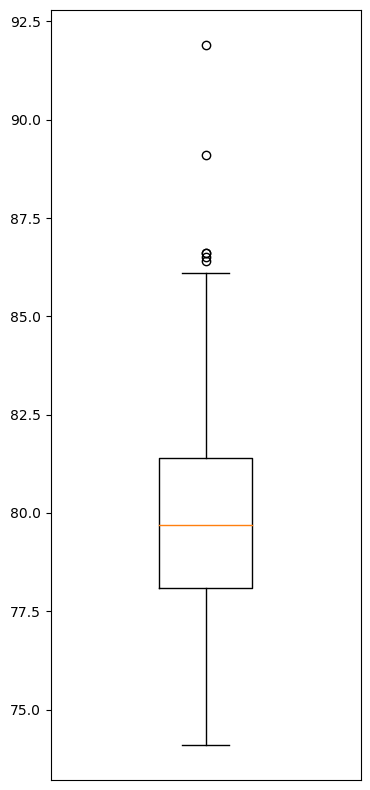

In [11]:
figure_width, figure_height = 4,10

plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
#axis_min = 0.95
#axis_max = 4.05
#plt.ylim([axis_min,axis_max])

# The next lines create and save the plot:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(ward_data['male_life_expect'], manage_ticks=(False))


## Choropleth Map of Variables

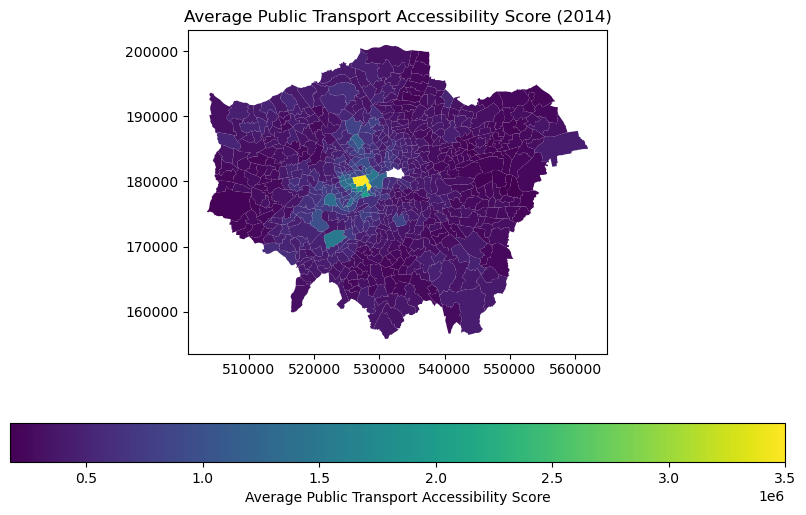

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
merged_ward.plot(column='median_house_price_2014', ax=ax, legend=True,
         legend_kwds={'label': 'Average Public Transport Accessibility Score', 'orientation': 'horizontal'})
plt.title('Average Public Transport Accessibility Score (2014)')
plt.show()

## Correlation Analysis

In [13]:
ward_corr = ward_data.iloc[:, 8:36]

correlation = ward_corr.corr()

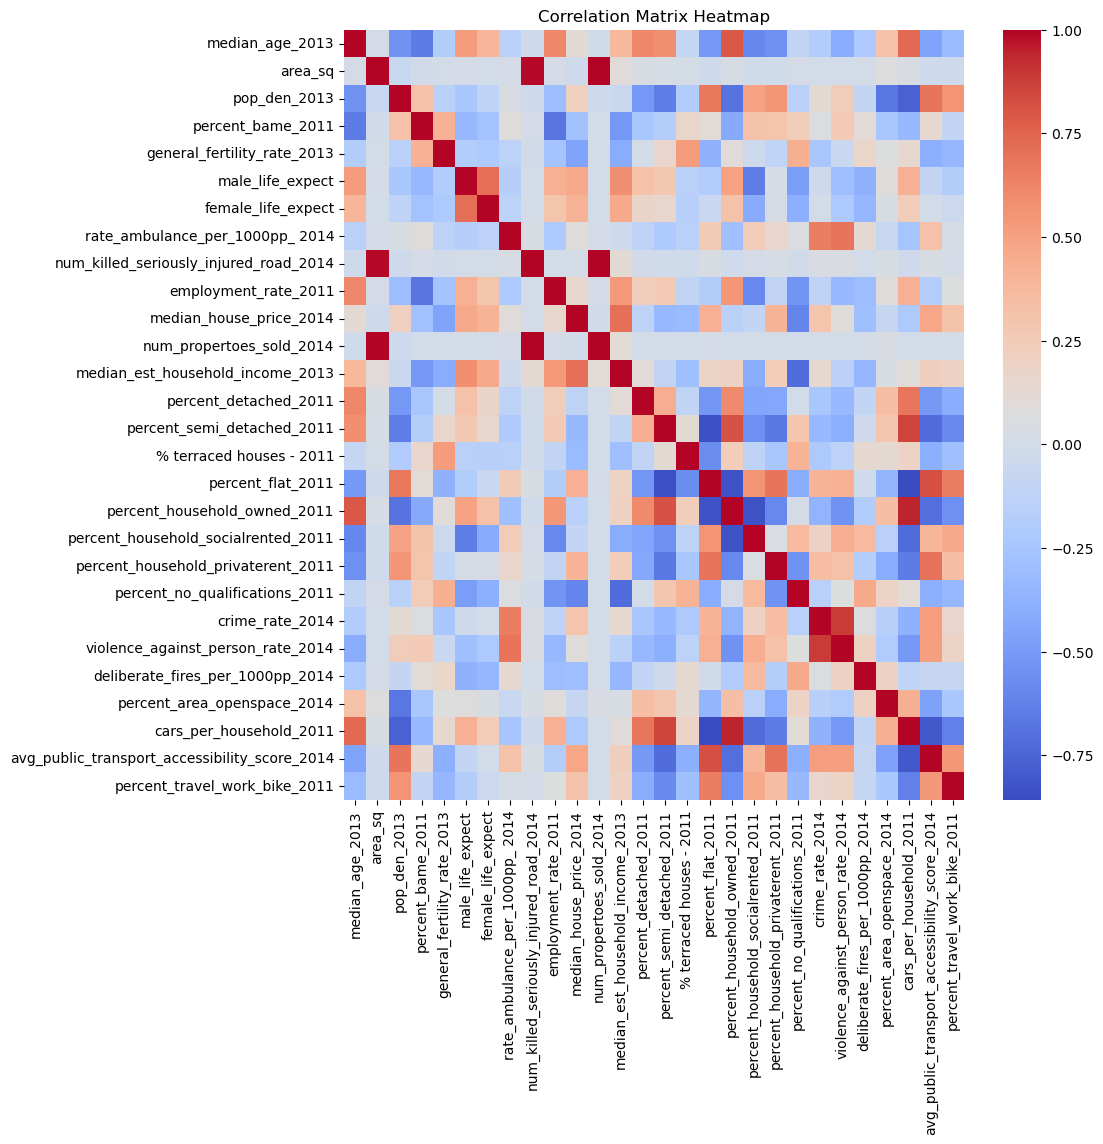

In [14]:
plt.figure(figsize=(10,10))
sb.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
new_column_names = {
    'employment_rate_2011': 'Employment Rate',
    'crime_rate_2014': 'Crime Rate',
    'percent_no_qualifications_2011': 'Population with No Qualifications (%)',
    'median_est_household_income_2013': 'Median Household Income',
    'pop_den_2013': 'Population Density',
    'percent_bame_2011': 'Population of BAME (%)',
    'avg_public_transport_accessibility_score_2014': 'Public Transport Accessibility Score',
    'median_house_price_2014': 'Median House Price'
}

ward_data = ward_data.rename(columns=new_column_names)

In [16]:
filtered_wards = ward_data[["Employment Rate", "Crime Rate", "Population with No Qualifications (%)", "Median Household Income",
                            "Population Density", "Population of BAME (%)", "Public Transport Accessibility Score", "Median House Price"]]

correlation2 = filtered_wards.corr()

In [17]:
filtered_wards.corr()

,Employment Rate,Crime Rate,Population with No Qualifications (%),Median Household Income,Population Density,Population of BAME (%),Public Transport Accessibility Score,Median House Price
Employment Rate,1.000000,-0.118951,-0.530995,0.535357,-0.308865,-0.681516,-0.180770,0.151279
Crime Rate,-0.118951,1.000000,-0.155910,0.138436,0.122002,0.051977,0.518119,0.308294
Population with No Qualifications (%),-0.530995,-0.155910,1.000000,-0.714596,-0.156285,0.250111,-0.391963,-0.605088
Median Household Income,0.535357,0.138436,-0.714596,1.000000,-0.058053,-0.521716,0.224323,0.706549
Population Density,-0.308865,0.122002,-0.156285,-0.058053,1.000000,0.320991,0.692000,0.217493
Population of BAME (%),-0.681516,0.051977,0.250111,-0.521716,0.320991,1.000000,0.131600,-0.278914
Public Transport Accessibility Score,-0.180770,0.518119,-0.391963,0.224323,0.692000,0.131600,1.000000,0.472662
Median House Price,0.151279,0.308294,-0.605088,0.706549,0.217493,-0.278914,0.472662,1.000000


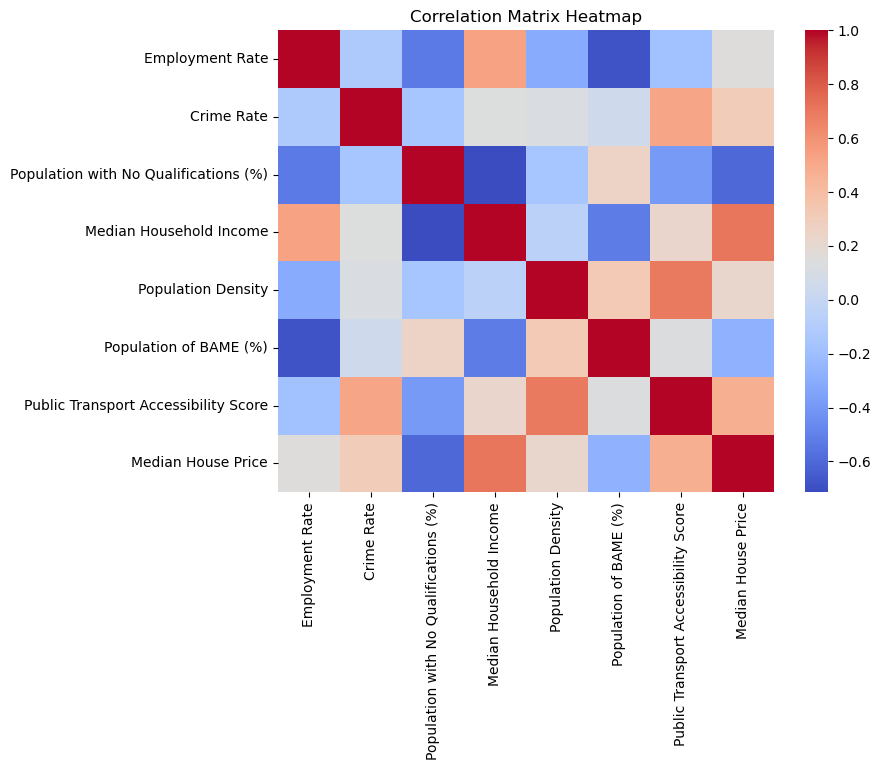

In [18]:
plt.figure(figsize=(8,6))
sb.heatmap(correlation2, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.savefig('correlation_wards.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
filtered_wards.head()

,Employment Rate,Crime Rate,Population with No Qualifications (%),Median Household Income,Population Density,Population of BAME (%),Public Transport Accessibility Score,Median House Price
0,51.4,314.1,7.8,40340,11650.0,40.4,8.0,560000.0
1,62.9,184.9,12.7,40430,9027.8,38.4,8.0,580000.0
2,66.6,170.5,8.2,51370,17642.9,37.2,8.0,975000.0
3,62.4,152.6,11.1,46880,13000.0,44.7,8.0,850000.0
4,71.3,1212.1,9.6,54970,5475.0,32.4,8.0,1487500.0


In [20]:
filtered_wards.dtypes

Employment Rate                          float64
Crime Rate                               float64
Population with No Qualifications (%)    float64
Median Household Income                    int64
Population Density                       float64
Population of BAME (%)                   float64
Public Transport Accessibility Score     float64
Median House Price                       float64
dtype: object

In [32]:
filtered_wards.columns

Index(['Employment Rate', 'Crime Rate',
       'Population with No Qualifications (%)', 'Median Household Income',
       'Population Density', 'Population of BAME (%)',
       'Public Transport Accessibility Score', 'Median House Price'],
      dtype='object')

## Analysis of Public Transport Accessibility Score

In [21]:
#filtered_wards['avg_public_transport_accessibility_score_2014'] = filtered_wards['avg_public_transport_accessibility_score_2014'].astype(float)
#filtered_wards['median_house_price_2014'] = filtered_wards['median_house_price_2014'].astype(float)

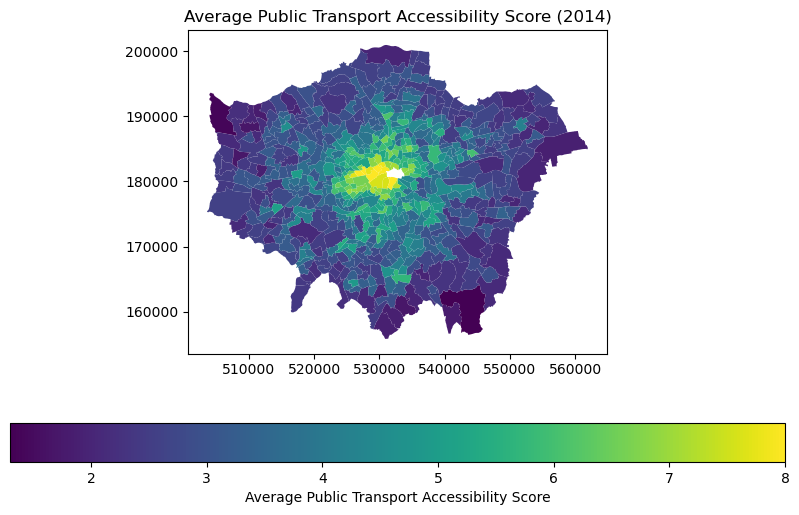

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
merged_ward.plot(column='avg_public_transport_accessibility_score_2014', ax=ax, legend=True,
         legend_kwds={'label': 'Average Public Transport Accessibility Score', 'orientation': 'horizontal'})
plt.title('Average Public Transport Accessibility Score (2014)')
plt.show()

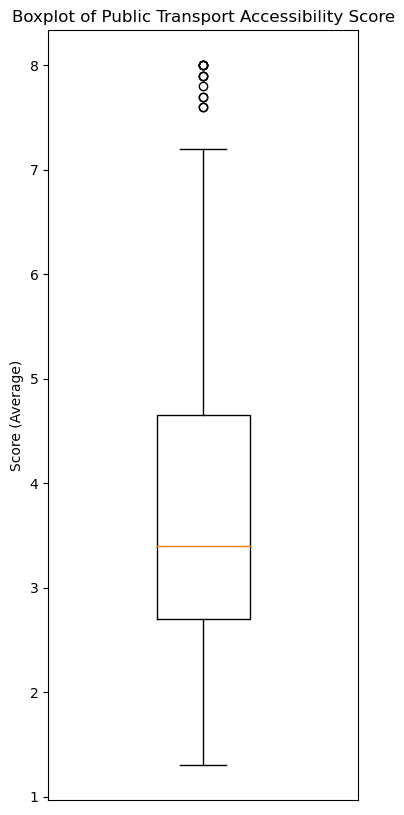

In [23]:
figure_width, figure_height = 4,10

plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
#axis_min = 0.95
#axis_max = 4.05
#plt.ylim([axis_min,axis_max])

# The next lines create and save the plot:
plt.xlim([0.75,1.25])
plt.xticks([])
plt.title('Boxplot of Public Transport Accessibility Score')
plt.ylabel('Score (Average)')

plt.boxplot(ward_data['Public Transport Accessibility Score'], manage_ticks=(False))
plt.savefig('transport_boxplot.jpg', dpi=300, bbox_inches='tight')
plt.show()


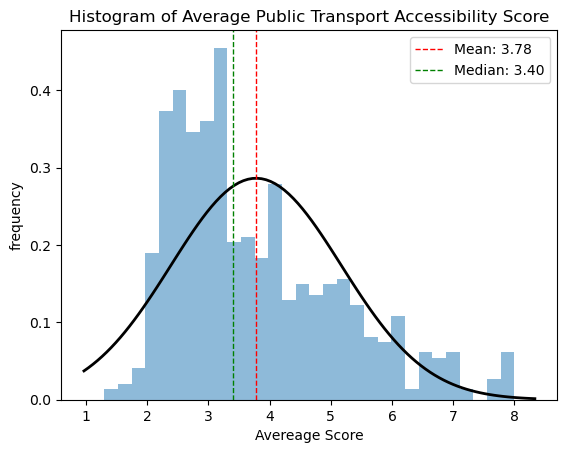

In [24]:
plt.hist(filtered_wards['Public Transport Accessibility Score'], bins=30, density=True, alpha=0.5)
from scipy import stats
mu, sigma = stats.norm.fit(filtered_wards['Public Transport Accessibility Score'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
mean_val = np.mean(filtered_wards['Public Transport Accessibility Score'])
median_val = np.median(filtered_wards['Public Transport Accessibility Score'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.title('Histogram of Average Public Transport Accessibility Score')
plt.xlabel('Avereage Score')
plt.ylabel('frequency')
plt.legend()
plt.savefig('transport_hist.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Analysis of Median House Prices

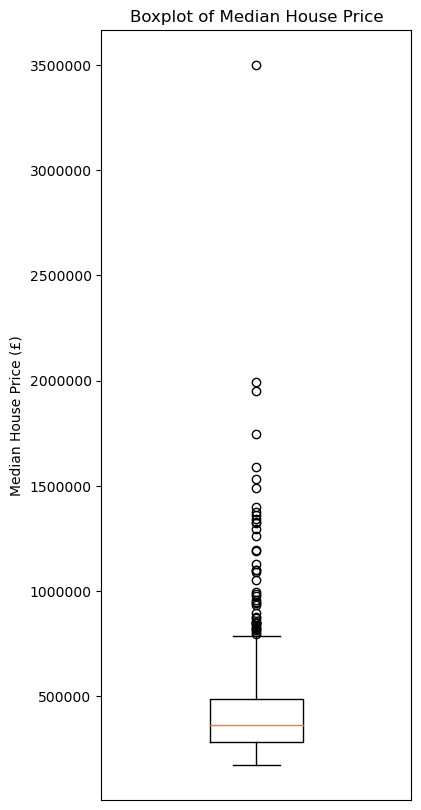

In [25]:
figure_width, figure_height = 4,10

plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
#axis_min = 0.95
#axis_max = 4.05
#plt.ylim([axis_min,axis_max])

# The next lines create and save the plot:
plt.title('Boxplot of Median House Price')
plt.ylabel('Median House Price (£)')
plt.xlim([0.75,1.25])
plt.xticks([])
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.boxplot(ward_data['Median House Price'], manage_ticks=(False))
plt.savefig('houseprice_boxplot.jpg', dpi=300, bbox_inches='tight')


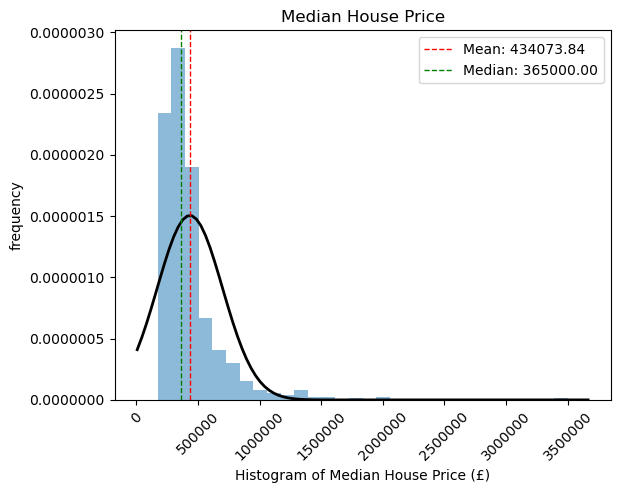

In [26]:
plt.hist(filtered_wards['Median House Price'], bins=30, density=True, alpha=0.5)
from scipy import stats
mu, sigma = stats.norm.fit(filtered_wards['Median House Price'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
mean_val = np.mean(filtered_wards['Median House Price'])
median_val = np.median(filtered_wards['Median House Price'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_val:.2f}')
plt.gca().ticklabel_format(useOffset=False, style='plain')
plt.title('Median House Price')
plt.xlabel('Histogram of Median House Price (£)')
plt.ylabel('frequency')
plt.legend()
plt.xticks(rotation=45)
plt.savefig('houseprice_hist.jpg', dpi=300, bbox_inches='tight')
plt.show()

## VIF

In [37]:
X = filtered_wards[['Employment Rate', 'Crime Rate',
       'Population with No Qualifications (%)', 'Median Household Income',
       'Population Density', 'Population of BAME (%)',
       'Public Transport Accessibility Score', 'Median House Price']]

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                 feature        VIF
0                        Employment Rate  83.403018
1                             Crime Rate   3.701603
2  Population with No Qualifications (%)  11.844268
3                Median Household Income  79.899781
4                     Population Density  10.254248
5                 Population of BAME (%)   6.722422
6   Public Transport Accessibility Score  29.891162
7                     Median House Price  10.405060


In [ ]:
is 